<a href="https://colab.research.google.com/github/sirlapat/ML_Assignment1/blob/main/ML_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [113]:
#Use the URL for the raw CSV data

df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


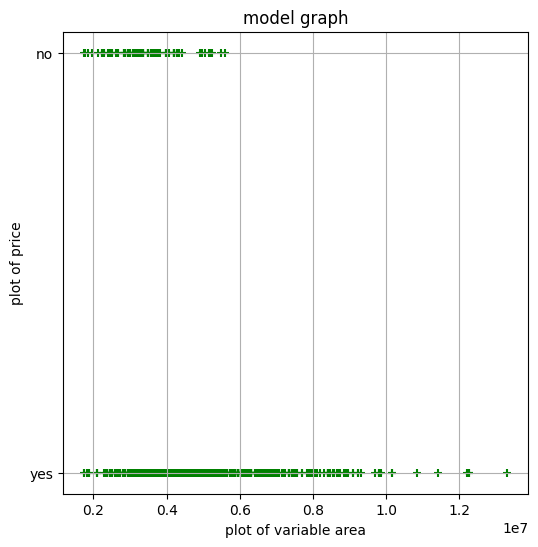

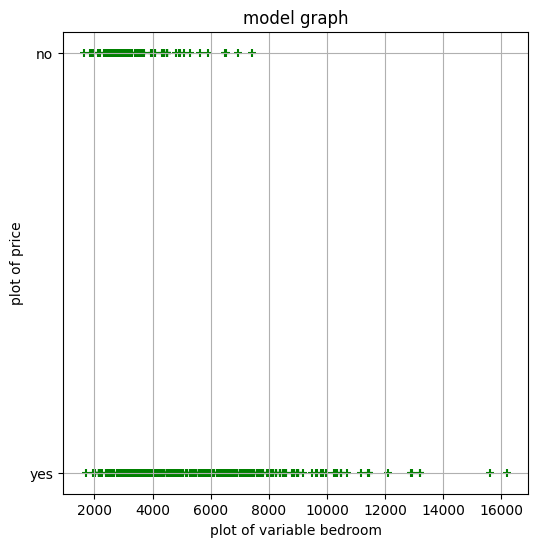

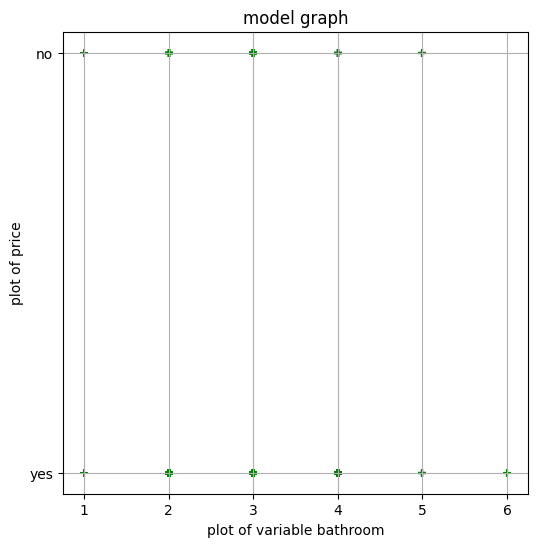

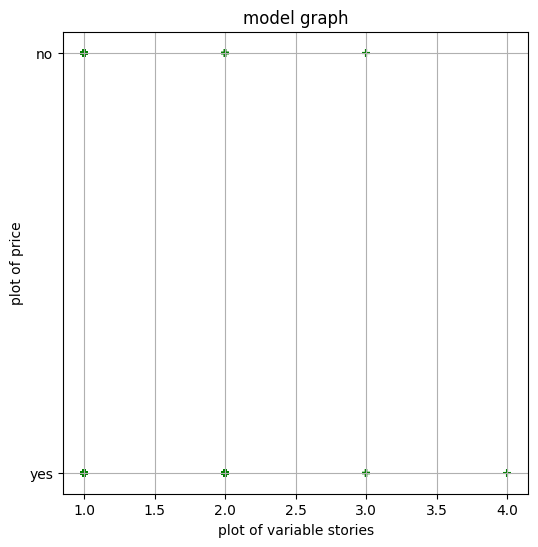

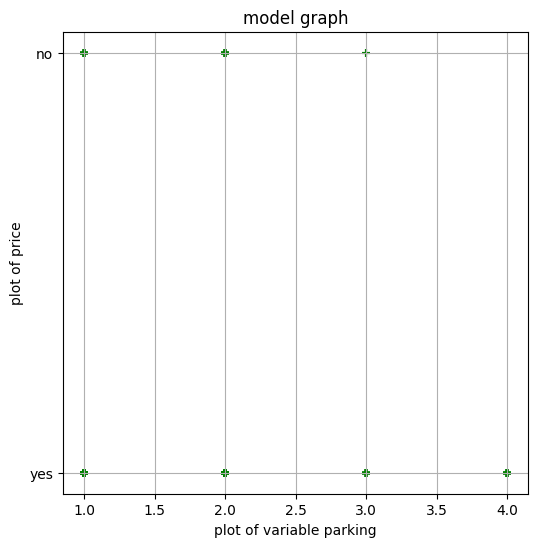

In [114]:
f = pd.read_csv('/content/drive/MyDrive/Housing.csv')
area = df.values[:,0]
bedroom = df.values[:,1]
bathroom = df.values[:,2]
stories = df.values[:,3]
parking = df.values[:,4]
price = df.values[:,5]

# Plot area
plt.scatter(area, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable area')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot bedroom
plt.scatter(bedroom, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable bedroom')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot bathroom
plt.scatter(bathroom, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable bathroom')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot stories
plt.scatter(stories, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable stories')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

# Plot parking
plt.scatter(parking, price, color='green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot of variable parking')
plt.ylabel('plot of price')
plt.title('model graph')

plt.show()

In [115]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [116]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df[input_features + [output_feature]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [117]:
X_train = df_train[input_features].to_numpy()
y_train = df_train[output_feature].to_numpy()
X_val = df_test[input_features].to_numpy()
y_val = df_test[output_feature].to_numpy()


In [118]:
#alpha is a learning rate and lambdaa is a regularization term
def Linear_Regression(X_train, y_train, X_val, y_val, epochs, alpha, lambdaa = 0):
  training_loss = []
  validation_loss = []

  m, n = X_train.shape
  np.random.seed(0)
  theta = np.random.randn(n+1,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]
  y_train = y_train.reshape(m,1)
  X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

  for iteration in range(epochs):
      gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambdaa * np.concatenate((np.zeros((1,1)), theta[1:]))) ## adding penalties for parameters starting from theta1
      theta -= alpha * gradients

      train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:]))) ##adding penalties for parameters starting from theta1
      theta -= alpha * gradients
      val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

      training_loss.append(train_loss)
      validation_loss.append(val_loss)
  return theta, training_loss, validation_loss

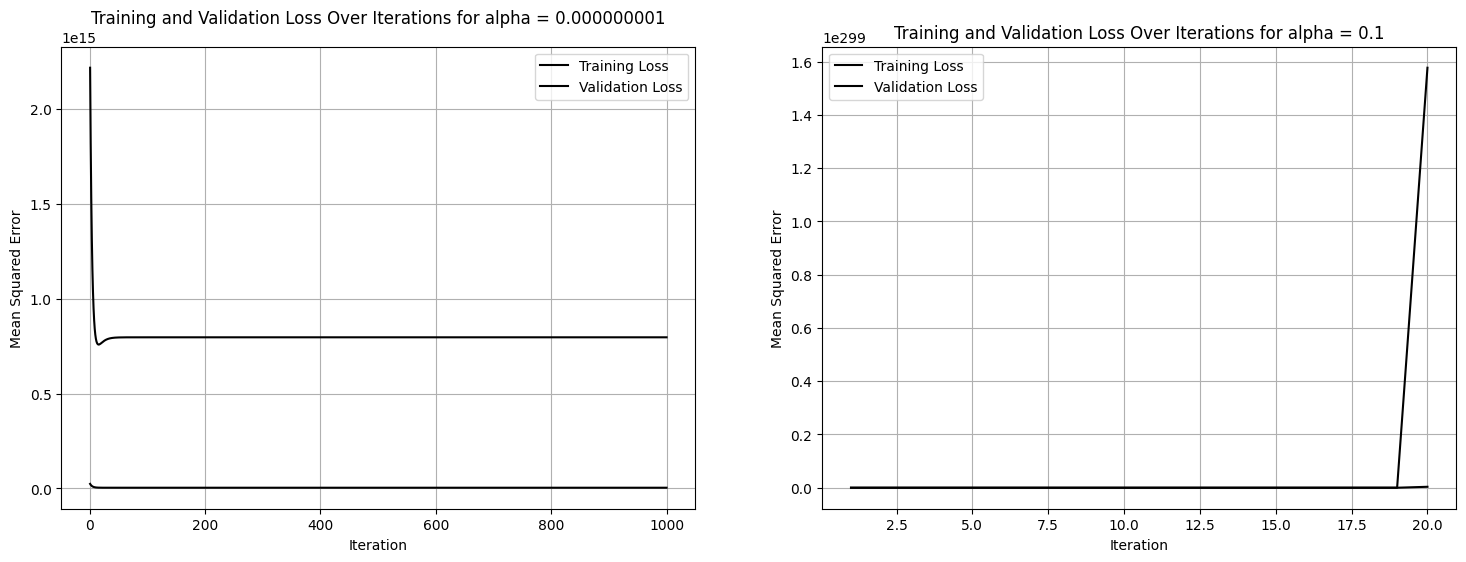

In [119]:
theta_alpha_1, train_loss_alpha_1, val_loss_alpha_1  = Linear_Regression(X_train, y_train, X_val, y_val,1000, alpha = 0.000000001)
theta_alpha_2, train_loss_alpha_2, val_loss_alpha_2  = Linear_Regression(X_train, y_train, X_val, y_val,20, alpha = 0.1)


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_1) + 1), train_loss_alpha_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_1) + 1), val_loss_alpha_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.000000001")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_2) + 1), train_loss_alpha_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_2) + 1), val_loss_alpha_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [120]:
train_loss_alpha_1[-1], val_loss_alpha_1[-1], train_loss_alpha_2[-1], val_loss_alpha_2[-1]

(3380173218478.3516,
 796684516828639.1,
 3.538878577559168e+296,
 1.577191876335089e+299)

In [121]:
theta_alpha_1

array([[3.35021388e+00],
       [8.61907461e+02],
       [6.85379458e+00],
       [5.61356865e+00],
       [7.02507227e+00],
       [2.72486018e-01]])

In [122]:
input_features_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features_2 = 'price'


In [123]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [124]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  0 non-null      float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [126]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_2, df_test_2 = train_test_split(df[input_features_2 + [output_features_2]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [127]:
X_train_2 = df_train_2[input_features_2].to_numpy()
y_train_2 = df_train_2['price'].to_numpy()
X_val_2 = df_test_2[input_features_2].to_numpy()
y_val_2 = df_test_2['price'].to_numpy()

In [128]:
theta_alpha_3, train_loss_alpha_3, val_loss_alpha_3  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha =  0.00000001)
print("Done 1")
theta_alpha_4, train_loss_alpha_4, val_loss_alpha_4  = Linear_Regression(X_train_2, y_train_2, X_val_2, y_val_2,25, alpha = 0.1)

Done 1


<ipython-input-118-27b08df85a0c>:19: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) + np.sum(np.square(theta[1:]))) ##adding penalties for parameters starting from theta1
<ipython-input-118-27b08df85a0c>:21: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))


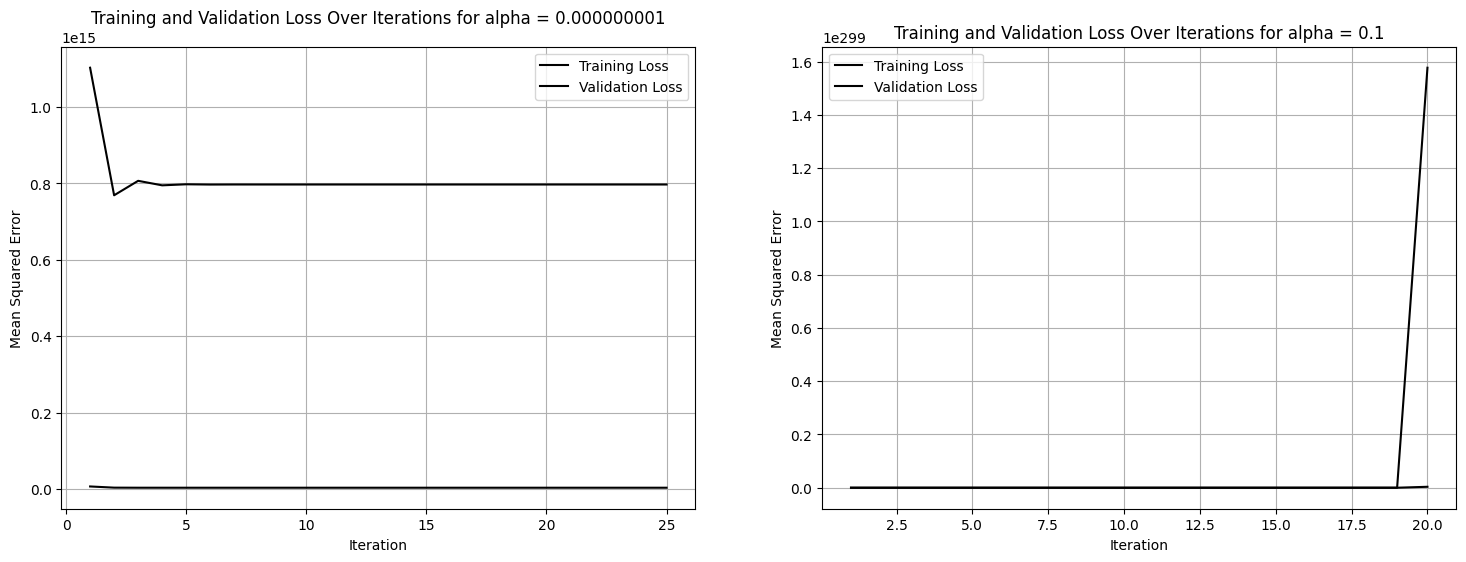

In [129]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_3) + 1), train_loss_alpha_3, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_3) + 1), val_loss_alpha_3, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.000000001")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_4) + 1), train_loss_alpha_4, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_4) + 1), val_loss_alpha_4, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [130]:
theta_alpha_3

array([[ 2.26752475e+00],
       [ 8.61911188e+02],
       [ 2.76635152e+00],
       [ 3.22634757e+00],
       [ 3.35397421e+00],
       [-5.38603923e-01],
       [ 1.11774619e+00],
       [ 1.17058972e-01],
       [-2.78205390e-02],
       [ 7.66486856e-01],
       [ 5.47747565e-01],
       [ 1.63962837e+00]])

In [131]:
train_loss_alpha_3[-1], val_loss_alpha_3[-1], train_loss_alpha_4[-1], val_loss_alpha_4[-1]

(3380196950665.692, 796687714289551.1, inf, inf)

In [132]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer_input = MinMaxScaler()
standardizer_input = StandardScaler()
normalizer_output = MinMaxScaler()
standardizer_output = StandardScaler()

X_train_normalize = normalizer_input.fit_transform(df_train[input_features])
y_train_normalize = normalizer_output.fit_transform(df_train[[output_feature]])

X_test_normalize = normalizer_input.transform(df_test[input_features])
y_test_normalize = normalizer_output.transform(df_test[[output_feature]])

X_train_standard = normalizer_input.fit_transform(df_train[input_features])
y_train_standard = standardizer_output.fit_transform(df_train[[output_feature]])

X_test_standard = normalizer_input.transform(df_test[input_features])
y_test_standard = standardizer_output.transform(df_test[[output_feature]])

In [133]:
theta_alpha_normal_input, train_loss_alpha_normal_input, val_loss_alpha_normal_input = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val ,2000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_input_1, train_loss_alpha_normal_input_1, val_loss_alpha_normal_input_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train,
                                                                                       X_test_normalize,
                                                                                       y_val, 2000, alpha = 0.1)

theta_alpha_normal, train_loss_alpha_normal, val_loss_alpha_normal = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize ,2000, alpha = 0.01)
print("Done 1")
theta_alpha_normal_1, train_loss_alpha_normal_1, val_loss_alpha_normal_1 = Linear_Regression(X_train_normalize,
                                                                                       y_train_normalize,
                                                                                       X_test_normalize,
                                                                                       y_test_normalize, 2000, alpha = 0.1)

Done 1
Done 1


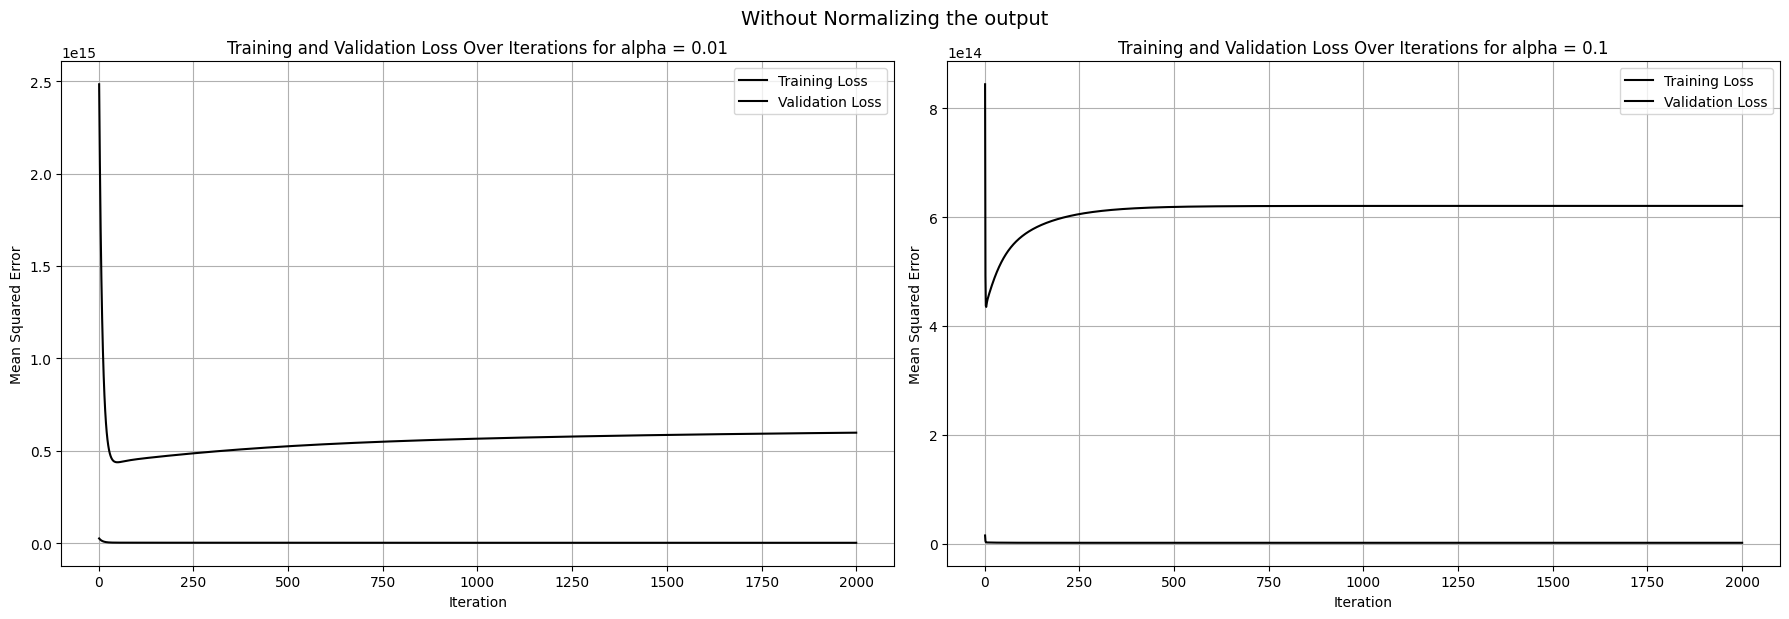

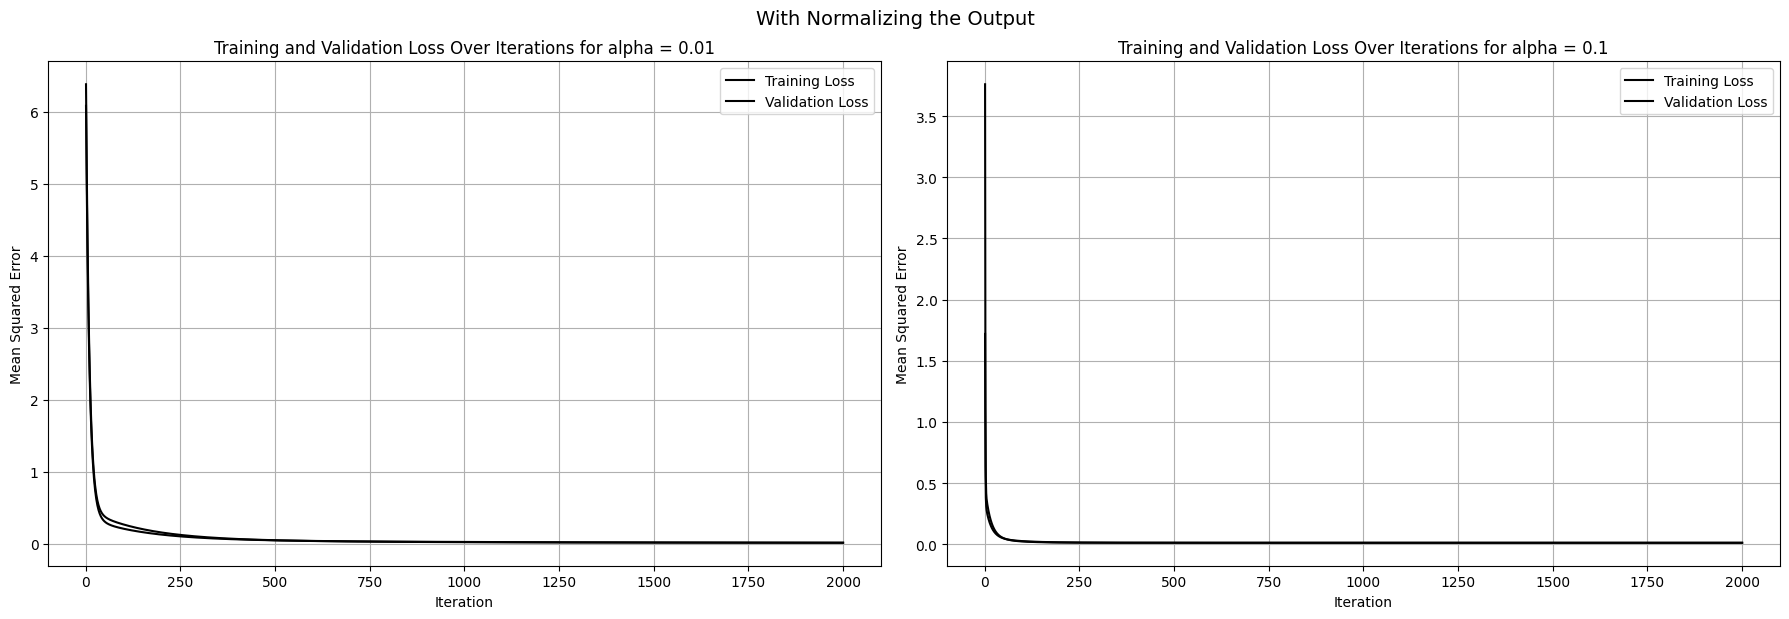

In [134]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input) + 1), train_loss_alpha_normal_input, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input) + 1), val_loss_alpha_normal_input, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1) + 1), train_loss_alpha_normal_input_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1) + 1), val_loss_alpha_normal_input_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal) + 1), train_loss_alpha_normal, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal) + 1), val_loss_alpha_normal, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1) + 1), train_loss_alpha_normal_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1) + 1), val_loss_alpha_normal_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()

In [135]:
theta_alpha_standard_input, train_loss_alpha_standard_input, val_loss_alpha_standard_input = Linear_Regression(X_train_standard,
                                                                                                               y_train,
                                                                                                               X_test_standard,
                                                                                                               y_val,2000, alpha = 0.01)
theta_alpha_standard_input_1, train_loss_alpha_standard_input_1, val_loss_alpha_standard_input_1 = Linear_Regression(X_train_standard,
                                                                                                                     y_train,
                                                                                                                     X_test_standard,
                                                                                                                     y_val,2000, alpha = 0.1)

theta_alpha_standard, train_loss_alpha_standard, val_loss_alpha_standard = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,2000, alpha = 0.01)
theta_alpha_standard_1, train_loss_alpha_standard_1, val_loss_alpha_standard_1 = Linear_Regression(X_train_standard,
                                                                                       y_train_standard,
                                                                                       X_test_standard,
                                                                                       y_test_standard ,2000, alpha = 0.1)

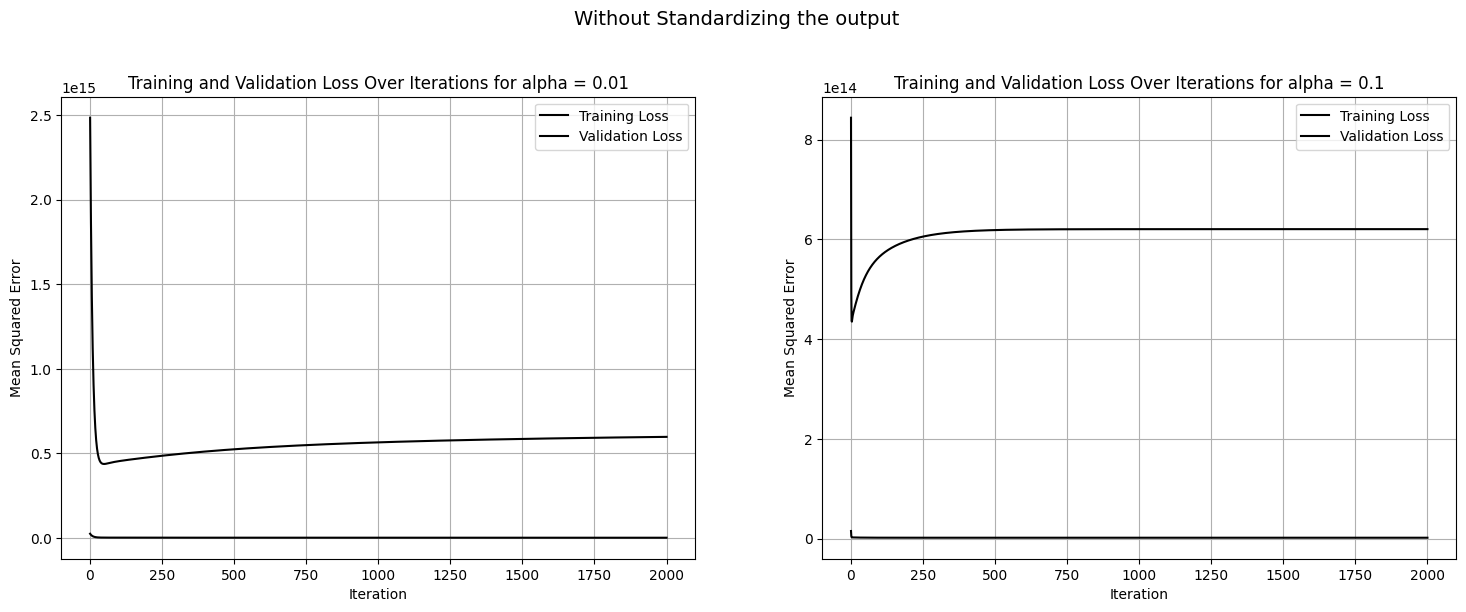

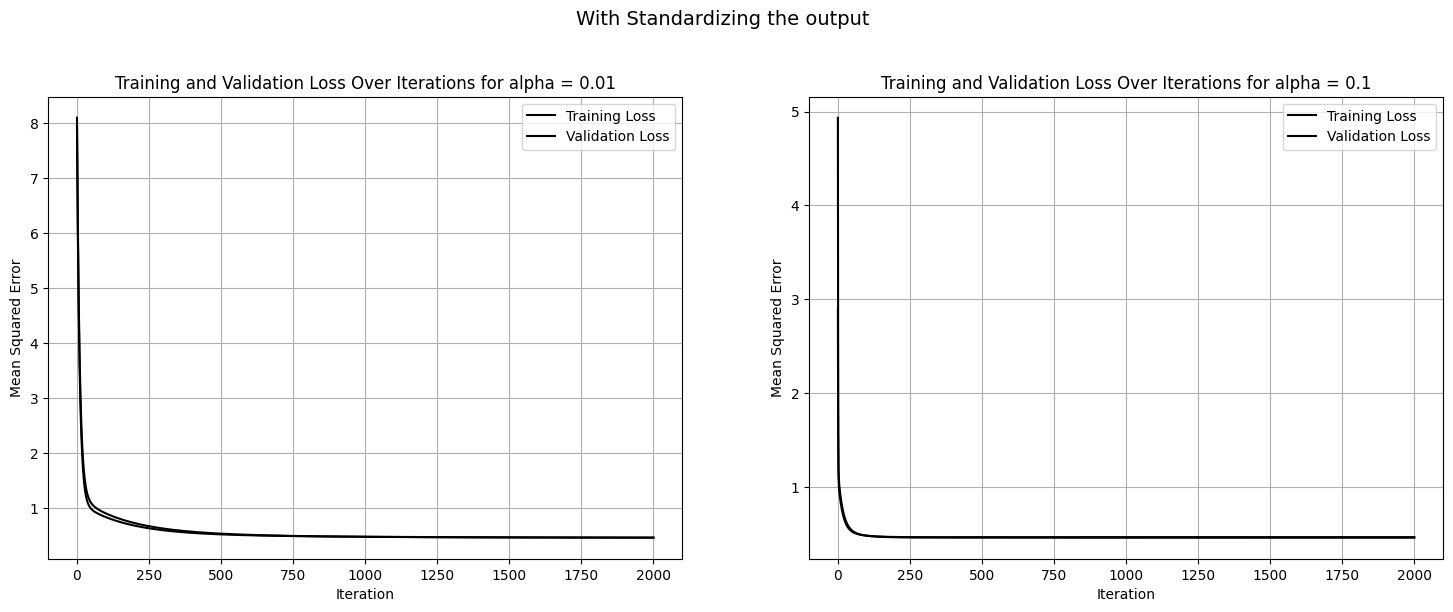

In [136]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input) + 1), train_loss_alpha_standard_input, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input) + 1), val_loss_alpha_standard_input, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1) + 1), train_loss_alpha_standard_input_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1) + 1), val_loss_alpha_standard_input_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard) + 1), train_loss_alpha_standard, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard) + 1), val_loss_alpha_standard, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1) + 1), train_loss_alpha_standard_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1) + 1), val_loss_alpha_standard_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [137]:
train_loss_alpha_normal[-1], train_loss_alpha_normal_1[-1], train_loss_alpha_standard[-1], train_loss_alpha_standard_1[-1]

(0.014176433690478859,
 0.012136360495069654,
 0.4669387717624579,
 0.46542548978539033)

In [138]:
val_loss_alpha_normal[-1], val_loss_alpha_normal_1[-1], val_loss_alpha_standard[-1], val_loss_alpha_standard_1[-1]

(0.015909625630756583,
 0.011967893855983788,
 0.4639519364529378,
 0.4589620647090527)

In [139]:
for i in theta_alpha_standard_1:
  for j in i:
    print(j)

-1.2774284455267806
2.616338590026038
0.29181704547024095
2.0534911776148848
0.846543182030557
0.5364641176377076


In [140]:
normalizer_input_2 = MinMaxScaler()
normalizer_output_2 = MinMaxScaler()
standardizer_input_2 = StandardScaler()
standardizer_output_2 = StandardScaler()

X_train_normalize_2 = normalizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_normalize_2 = normalizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_normalize_2 = normalizer_input_2.transform(df_test_2[input_features_2])
y_test_normalize_2 = normalizer_output_2.transform(df_test_2[[output_features_2]])

X_train_standard_2 = standardizer_input_2.fit_transform(df_train_2[input_features_2])
y_train_standard_2 = standardizer_output_2.fit_transform(df_train_2[[output_features_2]])

X_test_standard_2 = standardizer_input_2.transform(df_test_2[input_features_2])
y_test_standard_2 = standardizer_output_2.transform(df_test_2[[output_features_2]])

In [141]:
theta_alpha_normal_input_2, train_loss_alpha_normal_input_2, val_loss_alpha_normal_input_2 = Linear_Regression(X_train_normalize_2,
                                                                                                              y_train_2,
                                                                                                              X_test_normalize_2,
                                                                                                              y_val_2 ,1000, alpha = 0.01)
theta_alpha_normal_input_1_2, train_loss_alpha_normal_input_1_2, val_loss_alpha_normal_input_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_normalize_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_normal_2, train_loss_alpha_normal_2, val_loss_alpha_normal_2 = Linear_Regression(X_train_normalize_2,
                                                                                            y_train_normalize_2,
                                                                                            X_test_normalize_2,
                                                                                            y_test_normalize_2 ,1000, alpha = 0.01)
theta_alpha_normal_1_2, train_loss_alpha_normal_1_2, val_loss_alpha_normal_1_2 = Linear_Regression(X_train_normalize_2,
                                                                                                   y_train_normalize_2,
                                                                                                   X_test_normalize_2,
                                                                                                   y_test_normalize_2, 1000, alpha = 0.1)

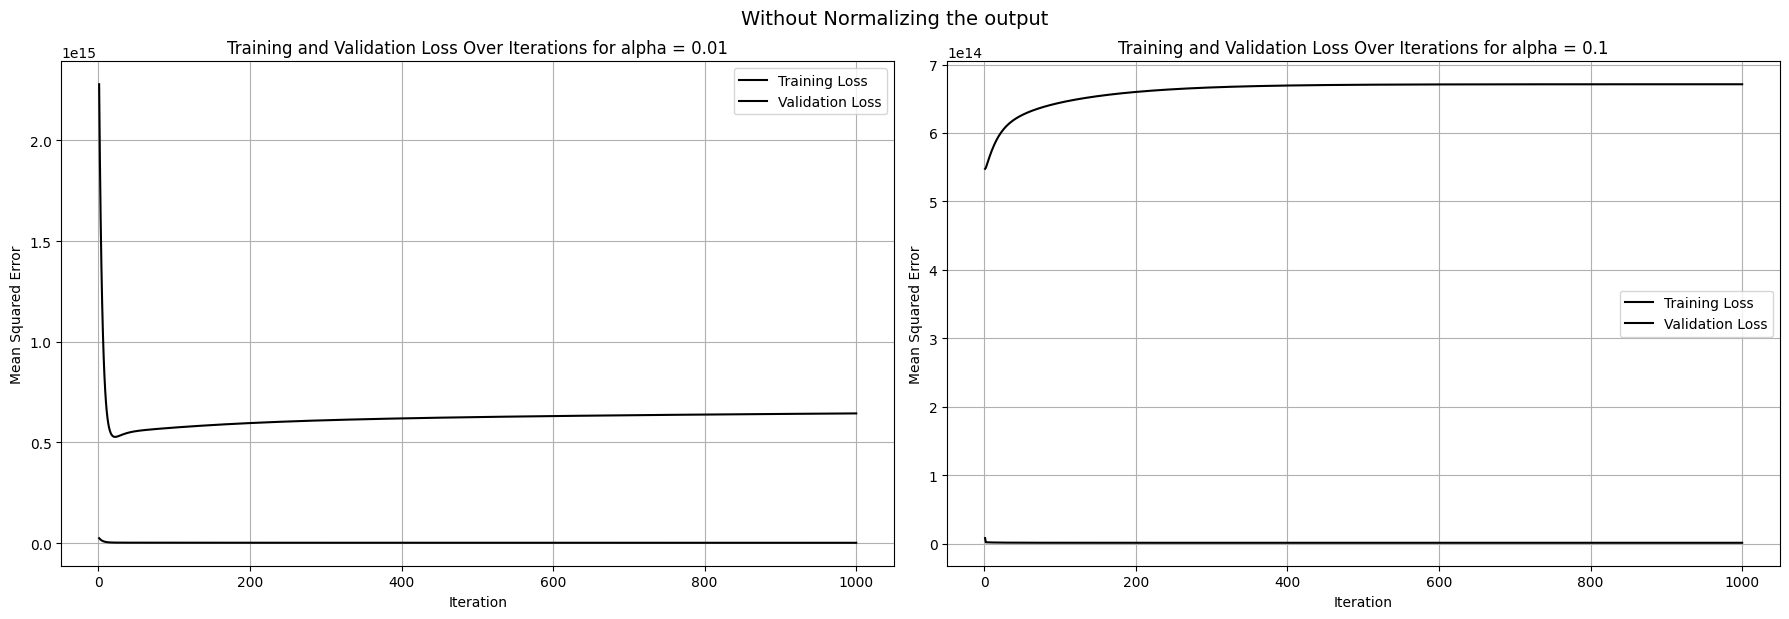

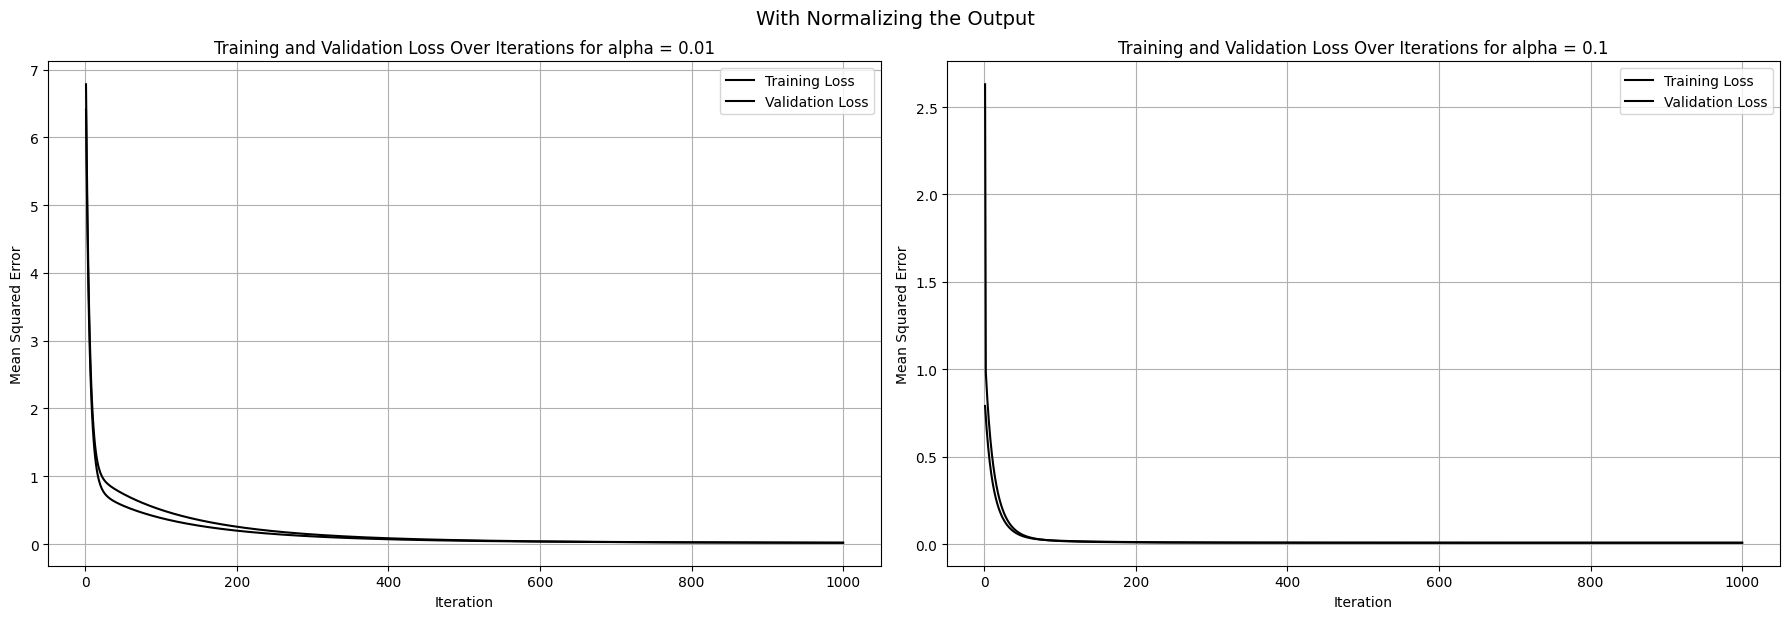

In [142]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_input_2) + 1), train_loss_alpha_normal_input_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_2) + 1), val_loss_alpha_normal_input_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Normalizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_input_1_2) + 1), train_loss_alpha_normal_input_1_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_input_1_2) + 1), val_loss_alpha_normal_input_1_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

plt.tight_layout()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_normal_2) + 1), train_loss_alpha_normal_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_2) + 1), val_loss_alpha_normal_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_normal_1_2) + 1), train_loss_alpha_normal_1_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_normal_1_2) + 1), val_loss_alpha_normal_1_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Normalizing the Output', ha='center', fontsize=14)

plt.tight_layout()

plt.show()


In [143]:
theta_alpha_standard_input_2, train_loss_alpha_standard_input_2, val_loss_alpha_standard_input_2 = Linear_Regression(X_train_standard_2,
                                                                                                               y_train_2,
                                                                                                               X_test_standard_2,
                                                                                                               y_val_2,1000, alpha = 0.01)
theta_alpha_standard_input_1_2, train_loss_alpha_standard_input_1_2, val_loss_alpha_standard_input_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                                     y_train_2,
                                                                                                                     X_test_standard_2,
                                                                                                                     y_val_2, 1000, alpha = 0.1)

theta_alpha_standard_2, train_loss_alpha_standard_2, val_loss_alpha_standard_2 = Linear_Regression(X_train_standard_2,
                                                                                             y_train_standard_2,
                                                                                             X_test_standard_2,
                                                                                             y_test_standard_2, 500, alpha = 0.01)
theta_alpha_standard_1_2, train_loss_alpha_standard_1_2, val_loss_alpha_standard_1_2 = Linear_Regression(X_train_standard_2,
                                                                                                   y_train_standard_2,
                                                                                                   X_test_standard_2,
                                                                                                   y_test_standard_2, 500, alpha = 0.1)

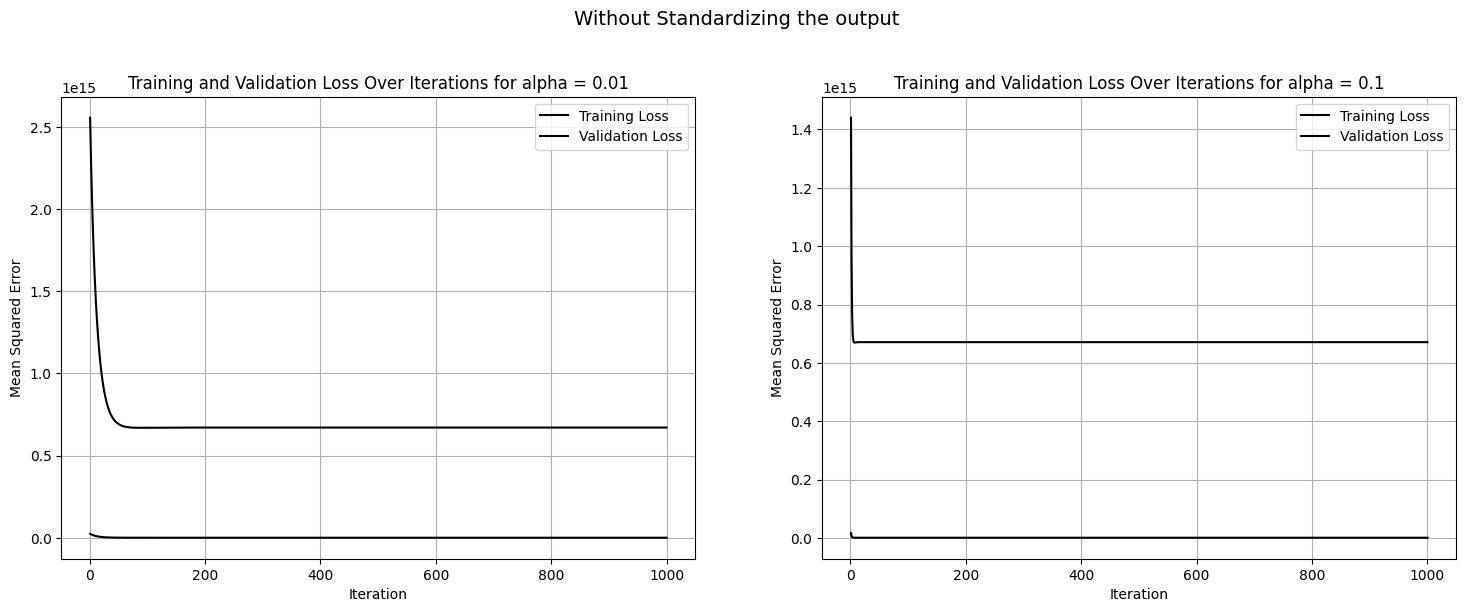

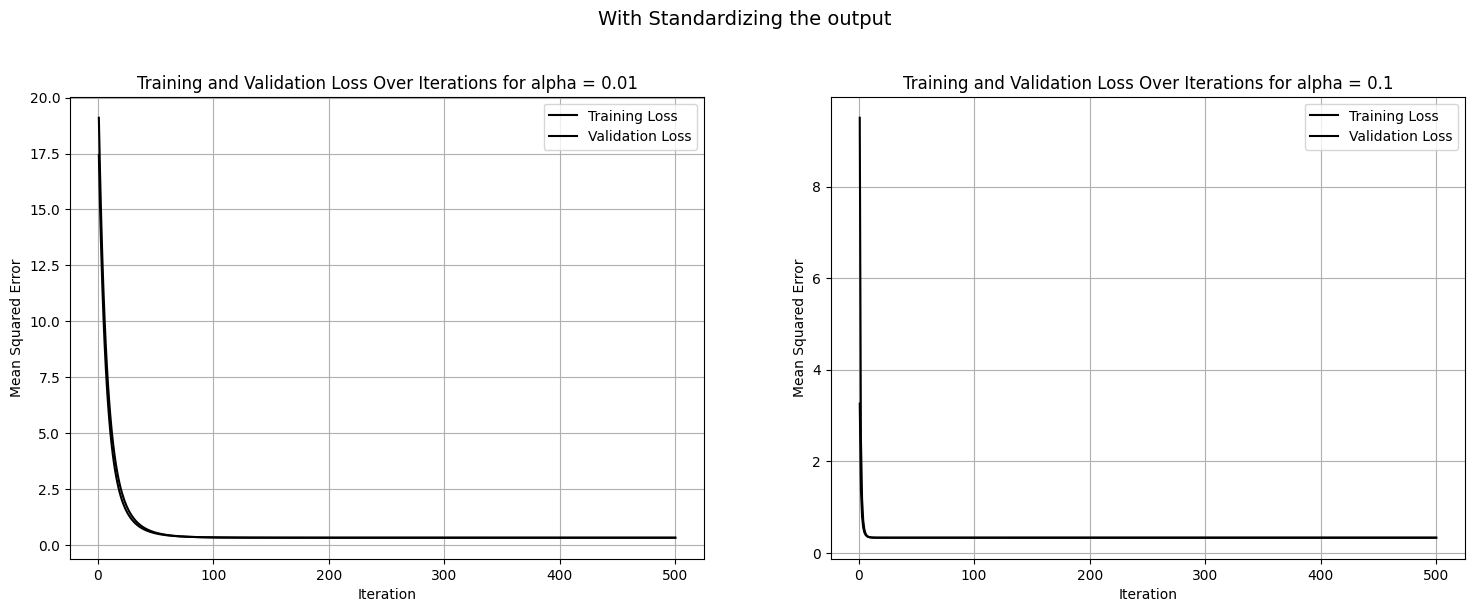

In [144]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_input_2) + 1), train_loss_alpha_standard_input_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_2) + 1), val_loss_alpha_standard_input_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()


middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'Without Standardizing the output', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_input_1_2) + 1), train_loss_alpha_standard_input_1_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_input_1_2) + 1), val_loss_alpha_standard_input_1_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_alpha_standard_2) + 1), train_loss_alpha_standard_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_2) + 1), val_loss_alpha_standard_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.01")
plt.grid()
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y = 1 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y, 'With Standardizing the output', ha='center', fontsize=14)


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_alpha_standard_1_2) + 1), train_loss_alpha_standard_1_2, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_alpha_standard_1_2) + 1), val_loss_alpha_standard_1_2, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for alpha = 0.1")
plt.legend()
plt.grid()
plt.show()

In [145]:
train_loss_alpha_normal_2[-1], train_loss_alpha_normal_1_2[-1], train_loss_alpha_standard_2[-1], train_loss_alpha_standard_1_2[-1]

(0.018881551398507654,
 0.00911923883516952,
 0.3309208814927949,
 0.3309208502985197)

In [146]:
val_loss_alpha_normal_2[-1], val_loss_alpha_normal_1_2[-1], val_loss_alpha_standard_2[-1], val_loss_alpha_standard_1_2[-1]

(0.02045185756093972,
 0.008679875954373776,
 0.3322854510244032,
 0.3322934350296885)

In [147]:
for i in theta_alpha_standard_1_2:
  for j in i:
    print(j)

5.3908512663055855e-17
0.28568816203330855
0.03899116054616524
0.3101673797125565
0.19710126940249725
0.11275374471720609
0.07830662685063436
0.0779669555039397
0.10989171633049341
0.2144163883016318
0.11929555325158073
0.13711064832709657


In [148]:
theta_lambda_0, train_loss_lambda_0, val_loss_lambda_0 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 0)


theta_lambda_1, train_loss_lambda_1, val_loss_lambda_1 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_5, train_loss_lambda_5, val_loss_lambda_5 = Linear_Regression(X_train_normalize,
                                                                         y_train_normalize,
                                                                         X_test_normalize,
                                                                         y_test_normalize, 2000, alpha = 0.1, lambdaa = 5)
theta_lambda_10, train_loss_lambda_10, val_loss_lambda_10 = Linear_Regression(X_train_normalize,
                                                                            y_train_normalize,
                                                                            X_test_normalize,
                                                                            y_test_normalize, 2000, alpha = 0.1, lambdaa = 10)

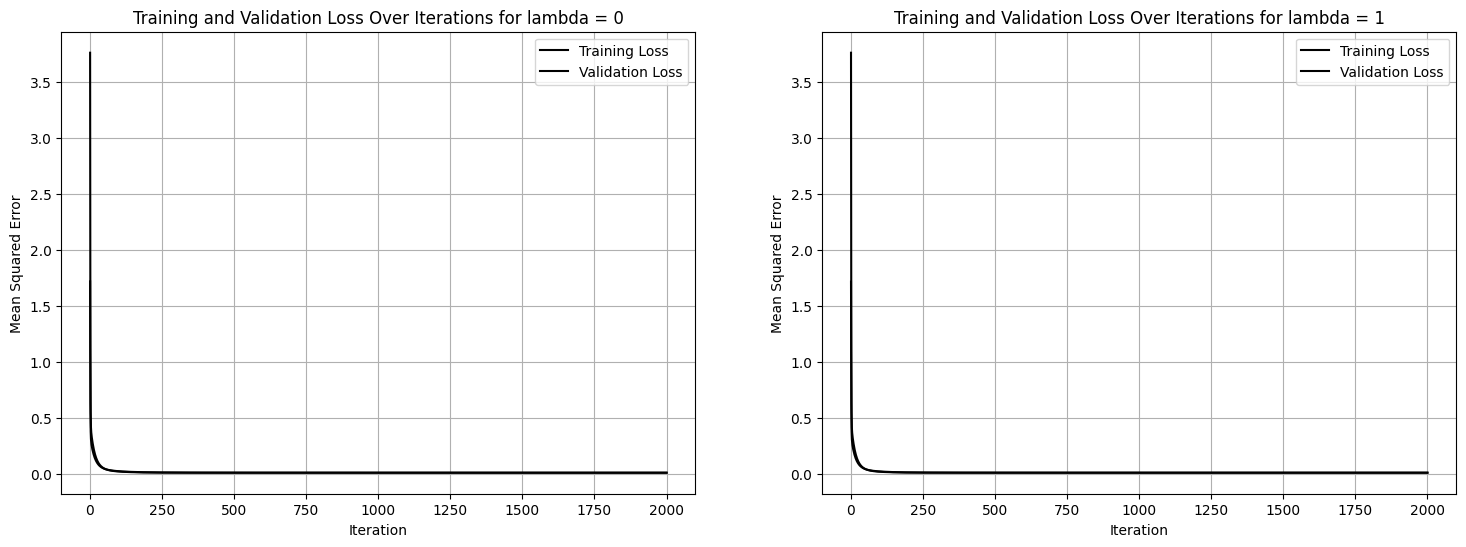

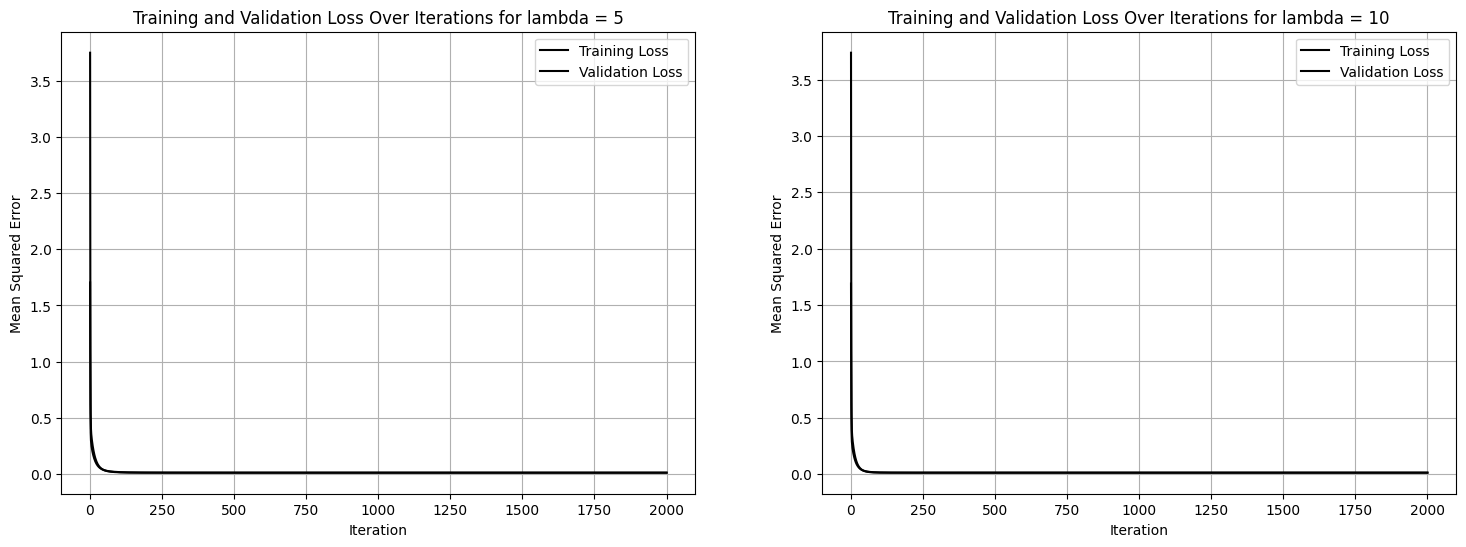

In [149]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_0) + 1), train_loss_lambda_0, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_0) + 1), val_loss_lambda_0, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_1) + 1), train_loss_lambda_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_1) + 1), val_loss_lambda_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_5) + 1), train_loss_lambda_5, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_5) + 1), val_loss_lambda_5, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_10) + 1), train_loss_lambda_10, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_10) + 1), val_loss_lambda_10, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()

In [150]:
train_loss_lambda_0[-1], train_loss_lambda_1[-1], train_loss_lambda_5[-1], train_loss_lambda_10[-1]

(0.012136360495069654,
 0.012083056317870837,
 0.012472050899686908,
 0.013261402702241255)

In [151]:
val_loss_lambda_0[-1], val_loss_lambda_1[-1], val_loss_lambda_5[-1], val_loss_lambda_10[-1]

(0.011967893855983788,
 0.011743560540914428,
 0.011704879706376339,
 0.01227028288879639)

In [152]:
for i in theta_lambda_5:
  for j in i:
    print(i)

[0.08729241]
[0.28288426]
[0.06516579]
[0.24528353]
[0.13550951]
[0.10297222]


In [153]:
theta_lambda_2_0, train_loss_lambda_2_0, val_loss_lambda_2_0 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 0)


theta_lambda_2_1, train_loss_lambda_2_1, val_loss_lambda_2_1 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 1)

theta_lambda_2_5, train_loss_lambda_2_5, val_loss_lambda_2_5 = Linear_Regression(X_train_normalize_2,
                                                                                y_train_normalize_2,
                                                                                X_test_normalize_2,
                                                                                y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 5)

theta_lambda_2_10, train_loss_lambda_2_10, val_loss_lambda_2_10 = Linear_Regression(X_train_normalize_2,
                                                                                    y_train_normalize_2,
                                                                                    X_test_normalize_2,
                                                                                    y_test_normalize_2, 2000, alpha = 0.1, lambdaa = 10)

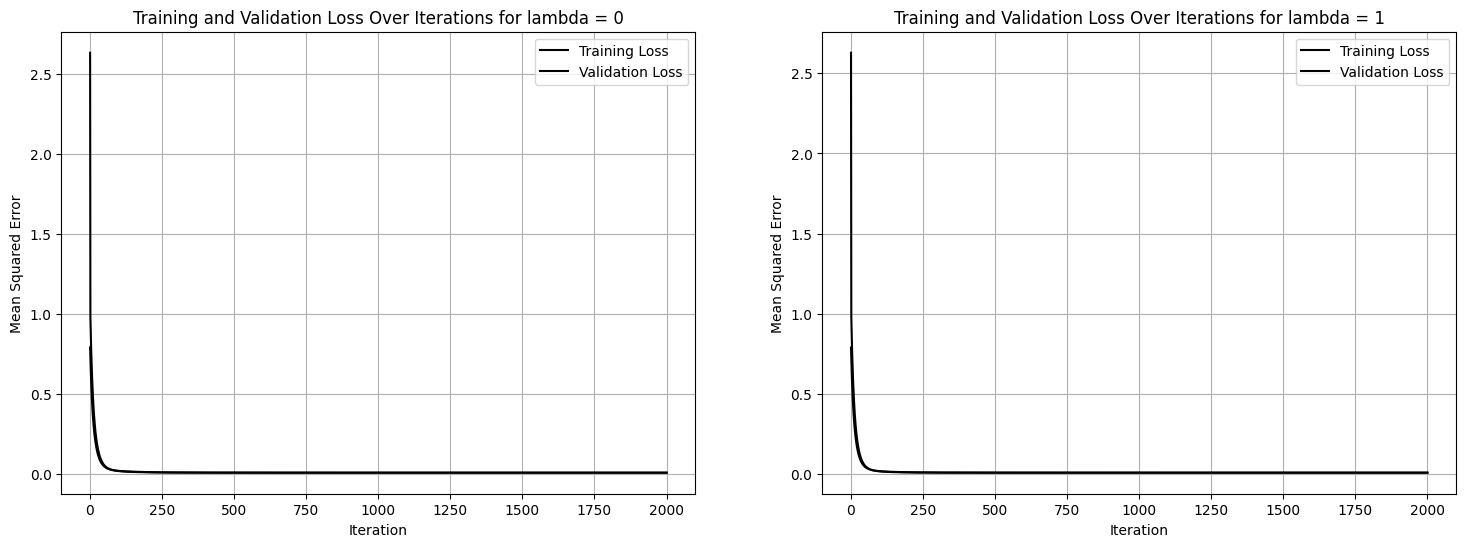

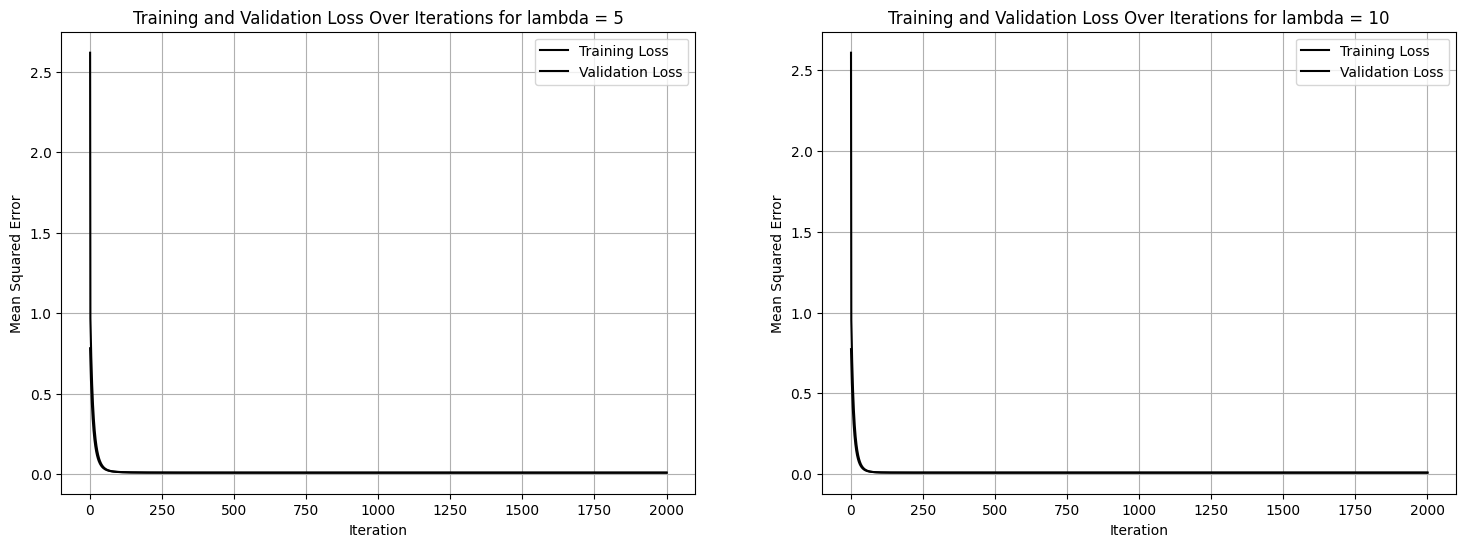

In [154]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_2_0) + 1), train_loss_lambda_2_0, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_0) + 1), val_loss_lambda_2_0, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 0")
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_2_1) + 1), train_loss_lambda_2_1, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_1) + 1), val_loss_lambda_2_1, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_lambda_2_5) + 1), train_loss_lambda_2_5, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_5) + 1), val_loss_lambda_2_5, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 5")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_lambda_2_10) + 1), train_loss_lambda_2_10, color='black', label = 'Training Loss')
plt.plot(range(1, len(val_loss_lambda_2_10) + 1), val_loss_lambda_2_10, color='black', label = 'Validation Loss')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss Over Iterations for lambda = 10")
plt.legend()
plt.grid()
plt.show()

In [155]:
train_loss_lambda_2_0[-1], train_loss_lambda_2_1[-1], train_loss_lambda_2_5[-1], train_loss_lambda_2_10[-1]

(0.009117825278400965,
 0.009082388638743154,
 0.009331542180437325,
 0.009833119780447963)

In [156]:
val_loss_lambda_2_0[-1], val_loss_lambda_2_1[-1], val_loss_lambda_2_5[-1], val_loss_lambda_2_10[-1]

(0.008664910188188707,
 0.008515818281967213,
 0.008447134479891158,
 0.008727664580883508)